In [1]:
library(tidyr)
library(dplyr)
library(ggplot2)


Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv("inflation_corruption_1995_2023_Ruben_Valverde.csv")
head(df)

,country,iso,region,inflation_2023,score_2023,rank_2023,inflation_2022,score_2022,rank_2022,inflation_2021,⋯,rank_1998,inflation_1997,score_1997,rank_1997,inflation_1996,score_1996,rank_1996,inflation_1995,score_1995,rank_1995
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,Afghanistan,AFG,AP,no data,20,162,10.6,24,150,7.8,⋯,NA,no data,NA,NA,no data,NA,NA,no data,NA,NA
2,Albania,ALB,ECA,4.8,37,98,6.7,36,101,2,⋯,NA,33.2,NA,NA,12.7,NA,NA,7.8,NA,NA
3,Algeria,DZA,MENA,9.3,36,104,9.3,33,116,7.2,⋯,NA,5.7,NA,NA,18.7,NA,NA,29.8,NA,NA
4,Angola,AGO,SSA,13.6,33,121,21.4,33,116,25.8,⋯,NA,221.5,NA,NA,4146,NA,NA,2672.2,NA,NA
5,Argentina,ARG,AME,133.5,37,98,72.4,38,94,48.4,⋯,61,no data,2.81,42,no data,3.41,35,no data,5.24,24
6,Armenia,ARM,ECA,2,47,62,8.6,46,63,7.2,⋯,NA,14,NA,NA,18.7,NA,NA,176.7,NA,NA


In [3]:
# Contar valores "no data" en cada columna
inflation <- df[, grepl("inflation", names(df))]
no_data_count <- colSums(inflation == "no data", na.rm = TRUE)
print(no_data_count)
print("-------------------")
print(paste("Total:", sum(no_data_count)))

inflation_2023 inflation_2022 inflation_2021 inflation_2020 inflation_2019 
             5              2              2              2              1 
inflation_2018 inflation_2017 inflation_2016 inflation_2015 inflation_2014 
             1              1              2              2              2 
inflation_2013 inflation_2012 inflation_2011 inflation_2010 inflation_2009 
             2              3              4              3              3 
inflation_2008 inflation_2007 inflation_2006 inflation_2005 inflation_2004 
             3              3              3              3              4 
inflation_2003 inflation_2002 inflation_2001 inflation_2000 inflation_1999 
             4              4              5              7              8 
inflation_1998 inflation_1997 inflation_1996 inflation_1995 
             9             11             13             16 
[1] "-------------------"
[1] "Total: 128"


In [4]:
# Reemplazar los valores "no data" por NA en todo el DataFrame
# porque da problemas al conteo
df[df == "no data"] <- NA

In [5]:
# Convertir las columnas de inflación de 1995 a 2023 a valores numéricos
for (year in 1995:2023) {
  column <- paste("inflation", year, sep = "_")
  df[[column]] <- as.numeric(df[[column]])
}

In [6]:
# Contar y mostrar el número de valores nulos por columna
print(colSums(is.na(df)))
print("------------------------------------------------------------------")
print(paste("Hay un total de", sum(is.na(df)), "valores nulos"))

       country            iso         region inflation_2023     score_2023 
             0              0              0              5              0 
     rank_2023 inflation_2022     score_2022      rank_2022 inflation_2021 
             0              2              0              0              2 
    score_2021      rank_2021 inflation_2020     score_2020      rank_2020 
             0              0              2              1              1 
inflation_2019     score_2019      rank_2019 inflation_2018     score_2018 
             1              1              1              1              1 
     rank_2018 inflation_2017     score_2017      rank_2017 inflation_2016 
             1              1              1              1              2 
    score_2016      rank_2016 inflation_2015     score_2015      rank_2015 
             9              9              2             16             16 
inflation_2014     score_2014      rank_2014 inflation_2013     score_2013 
            

In [7]:
# Transformar el DataFrame de formato ancho a formato largo para poder analizar los datos de inflación, puntuación y rango a lo largo del tiempo posteriormente
df_melted <- df %>%
  pivot_longer(cols = starts_with("inflation_") | starts_with("score_") | starts_with("rank_"),
  names_to = c(".value", "year"),
  names_sep = "_") %>%
select(country, iso, region, year, inflation, score, rank)

In [8]:
# Convertir las columnas 'inflation', 'rank' y 'score' a tipo numérico en el DataFrame df_melted
df_melted <- df_melted %>%
    mutate(across(c(inflation, rank, score), as.numeric))
head(df_melted)

country,iso,region,year,inflation,score,rank
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,AP,2023,NA,20,162
Afghanistan,AFG,AP,2022,10.6,24,150
Afghanistan,AFG,AP,2021,7.8,16,174
Afghanistan,AFG,AP,2020,5.6,19,165
Afghanistan,AFG,AP,2019,2.3,16,173
Afghanistan,AFG,AP,2018,0.6,16,172


In [9]:
summary(df_melted)

   country              iso               region              year          
 Length:5133        Length:5133        Length:5133        Length:5133       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   inflation            score            rank       
 Min.   :  -72.70   Min.   : 0.40   Min.   :  1.00  
 1st Qu.:    1.80   1st Qu.: 3.50   1st Qu.: 35.00  
 Median :    4.00   Median :10.00   Median : 74.00  
 Mean   :   28.78   Mean   :24.07   Mean   : 78.74  
 3rd Qu.:    8.10   3rd Qu.:38.00   3rd Qu.:121.00  
 Max.   :65374.10   Max.   :92.00   Max.   :182.00  
 NA's   :128 

In [30]:
# Crear un DataFrame con la inflación promedio anual por región
df_avg_inflation <- df_melted %>%
    group_by(region, year) %>%
    summarise(inflation = median(inflation, na.rm = TRUE), .groups = "drop") %>%
    ungroup()

# Nota: Se utilizó la mediana en lugar del promedio para evitar que valores extremos afecten el resultado (Como la inflación de 1995 en Europa Oriental y Asia Central causada por Bulgaria y Venezuela en América)

In [11]:
# Agregar un tema a los gráficos
theme_set(theme_bw())

# Ajustar el tamaño de los gráficos
options(repr.plot.width=17, repr.plot.height=7)

# Hacer las letras más grandes y los títulos centrados
theme_update(
    plot.title = element_text(size = 20, hjust = 0.5),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`)."


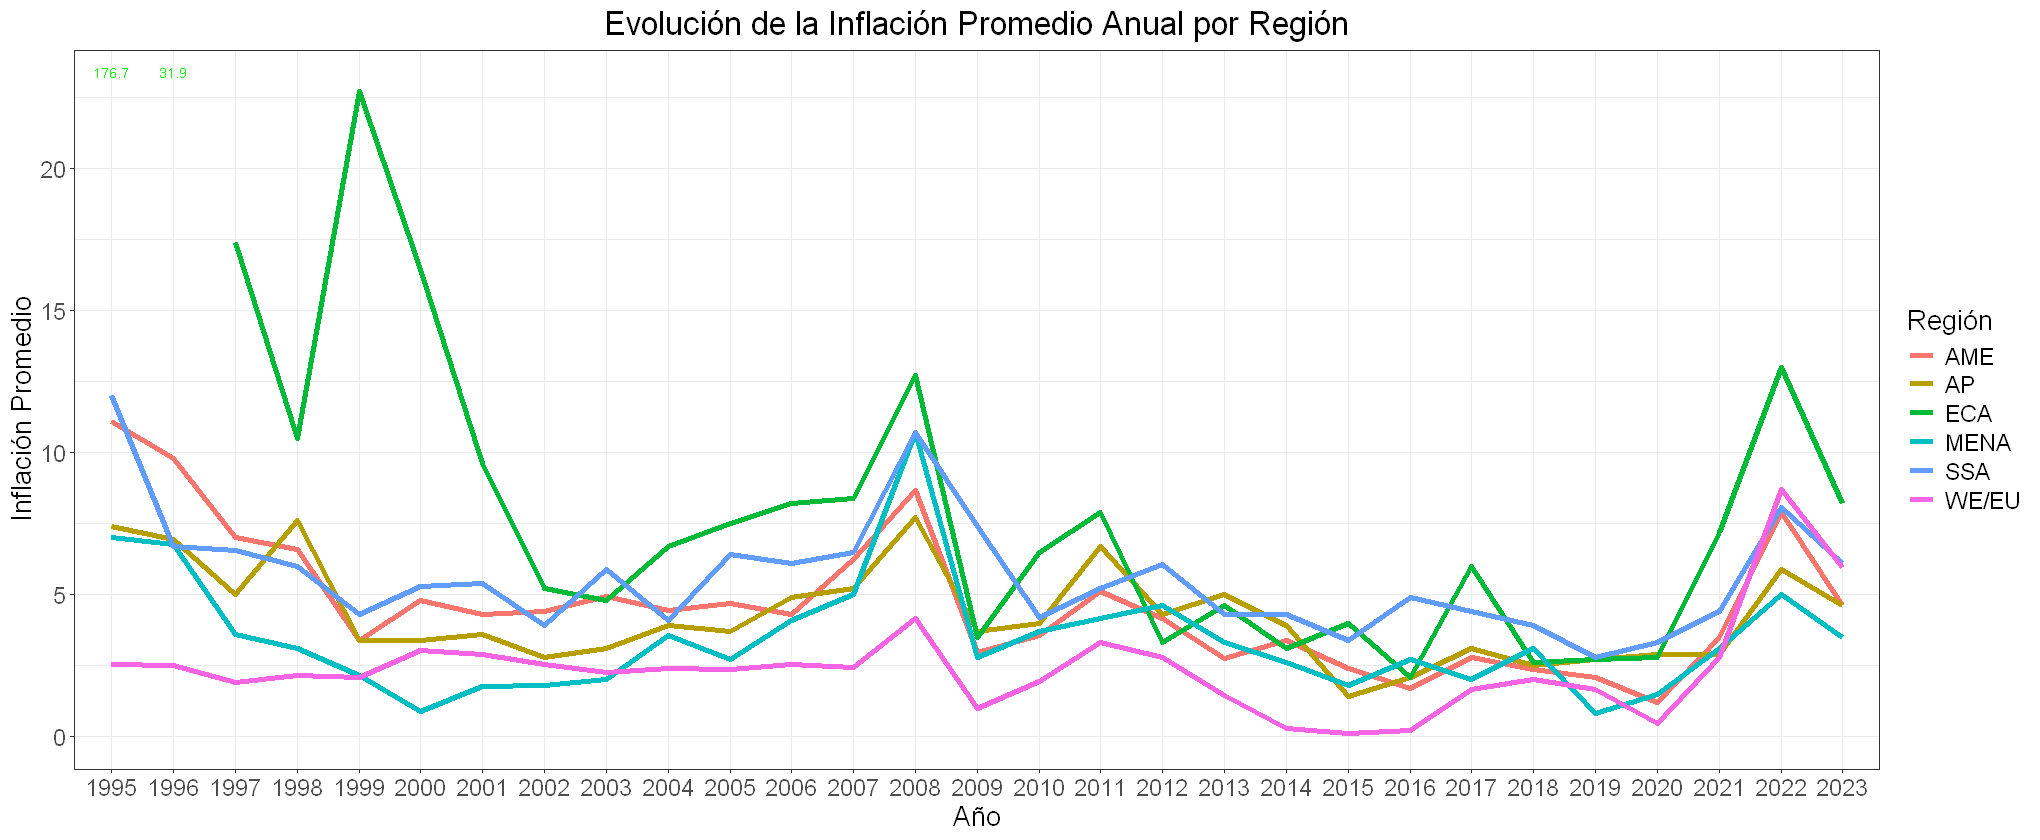

In [12]:
# Crear el lineplot
ggplot(df_avg_inflation, aes(x = year, y = inflation, color = region, group = region)) +
    geom_line(size=1.5) +
    scale_y_continuous(limits = c(0, 23)) +
    geom_text(data = df_avg_inflation %>% filter(inflation > 23),
              aes(label = round(inflation, 1), y = 23),
              color = "green", size = 3, vjust = -0.5) +
    labs(title = "Evolución de la Inflación Promedio Anual por Región",
         x = "Año",
         y = "Inflación Promedio",
         color = "Región")



### Análisis del Gráfico de Evolución de la Inflación Promedio Anual por Región

El gráfico muestra la evolución de la inflación promedio anual por región desde 1995 hasta 2023. A continuación, se presentan algunos puntos clave observados en el gráfico:

1. **América (AME)**:
    - Se observa una tendencia general a la baja en la inflación desde 1995 hasta principios de la década de 2000.
    - Sin embargo, hay picos significativos en ciertos años, lo que indica episodios de alta inflación en algunos países de la región.
    - En los últimos años, la inflación ha vuelto a aumentar, alcanzando niveles preocupantes.

2. **África Subsahariana (SSA)**:
    - La región muestra una tendencia similar a la de Latinoamérica, con una disminución de la inflación en la primera década del siglo XXI.
    - A partir de 2010, la inflación ha mostrado una tendencia al alza, con picos notables en algunos años.

3. **Asia-Pacífico (AP)**:
    - La región ha mantenido una inflación relativamente baja y estable en comparación con otras regiones.
    - Aunque hay algunos picos, la inflación en Asia-Pacífico ha sido más controlada.

4. **Europa Occidental y Union Europea (WE/EU)**:
    - Esta región ha experimentado una inflación muy baja y estable durante la mayor parte del período analizado.
    - Sin embargo, en los últimos años se observa un aumento en la inflación, esto es debido al aumento maviso de la masa monetaria para superar la crisis del covid en un corto periodo de tiempo.

5. **Medio Oriente y Norte de África (MENA)**:
    - La región muestra una inflación relativamente alta en comparación con Europa y Asia-Pacífico.
    - Hay fluctuaciones significativas en la inflación, lo que indica inestabilidad económica en algunos países de la región.

6. **Europa Oriental y Asia Central (ECA)**:
    - La región de ECA muestra una tendencia fluctuante en la inflación a lo largo de los años.
    - Aunque algunos países han logrado mantener una inflación baja y estable, otros continúan enfrentando episodios de alta inflación.


In [13]:
# Al ejecutar el gráfico previamente se podia observar que el formato del CPI cambió en 2012, siendo 100 la puntuación máxima en lugar de 10.
df_melted %>%
    filter(year %in% c(2010, 2011, 2012, 2013)) %>%
    group_by(region, year) %>%
    summarise(score = mean(score, na.rm = TRUE), .groups = "drop") %>%
    head(4)

region,year,score
<chr>,<chr>,<dbl>
AME,2010,4.022222
AME,2011,4.161290
AME,2012,44.903226
AME,2013,44.290323


In [14]:
# Multiplico por 10 el CPI de los años 1995 hasta 2011 para que estén en la misma escala que los años posteriores
df_melted <- df_melted %>%
    mutate(score = ifelse(year >= 1995 & year <= 2011, score * 10, score))

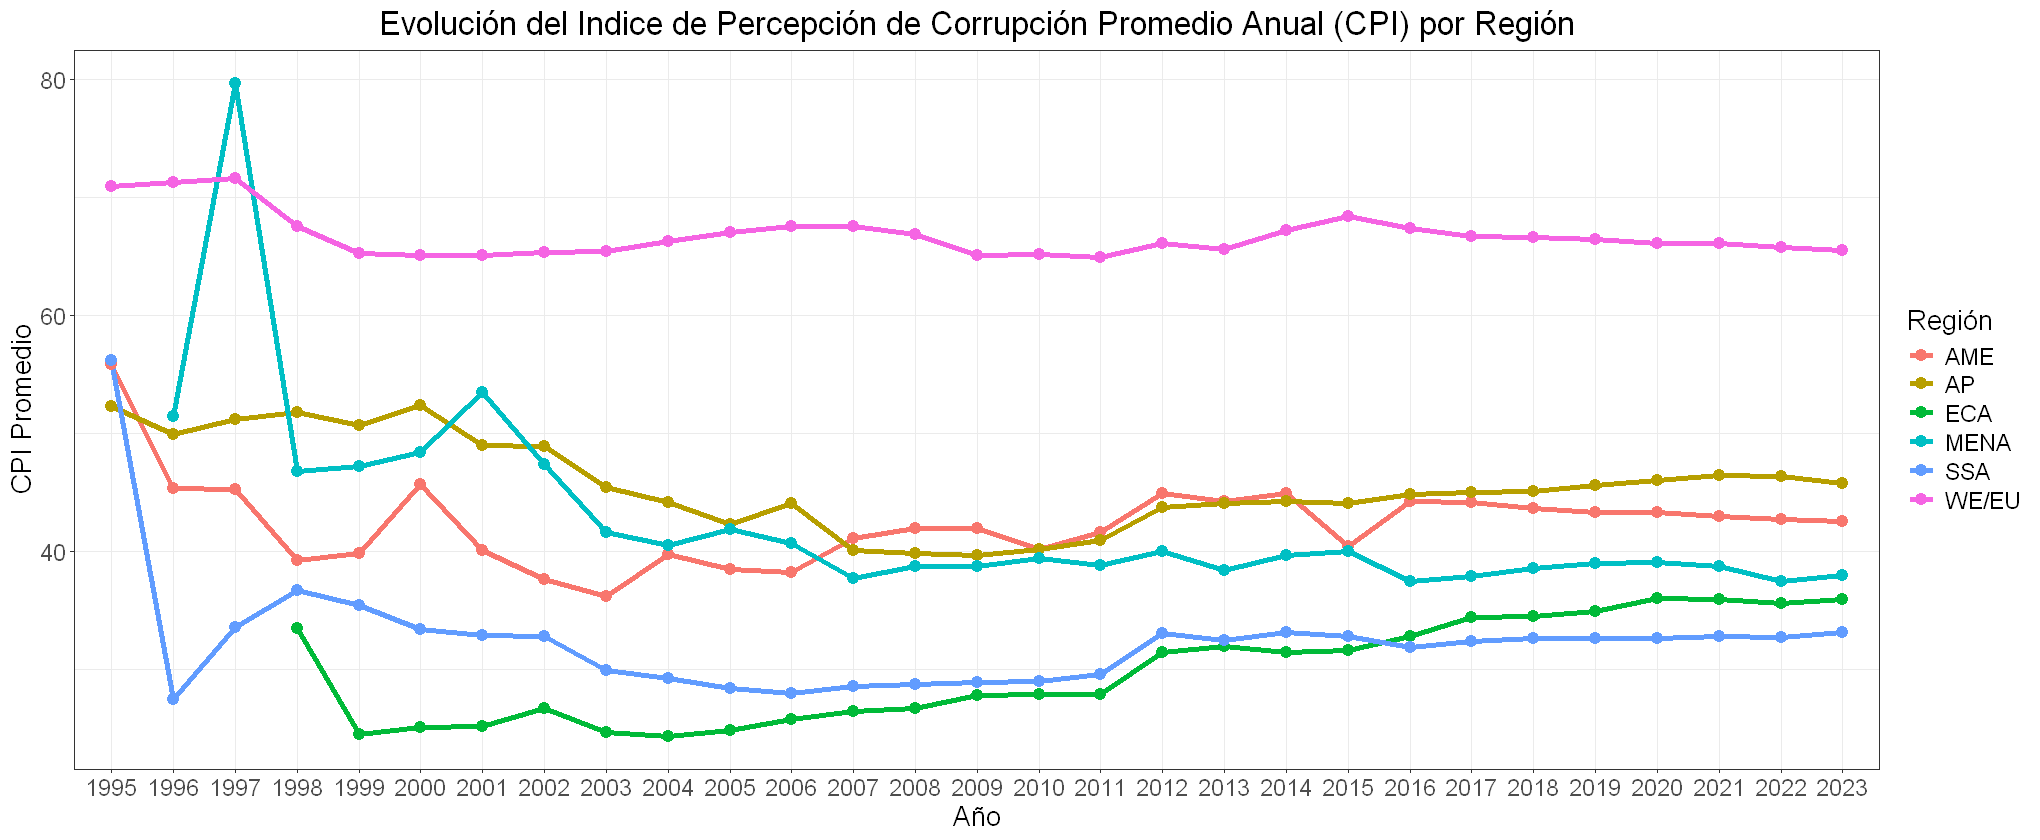

In [26]:
# Calcular el CPI promedio anual por región
df_avg_score <- df_melted %>%
    group_by(region, year) %>%
    summarise(score = mean(score, na.rm = TRUE), .groups = "drop") %>%
    ungroup()

# Eliminar filas con valores nulos en la columna 'score', provocaban warnings
df_avg_score <- df_avg_score %>% drop_na(score)   

# Crear el lineplot
ggplot(df_avg_score, aes(x = year, y = score, color = region, group = region)) +
    geom_line(size=1.5) +
    geom_point(size=3) +
    labs(title = "Evolución del Indice de Percepción de Corrupción Promedio Anual (CPI) por Región",
         x = "Año",
         y = "CPI Promedio",
         color = "Región")


### Análisis del Gráfico de Evolución de la Puntuación de Corrupción Promedio Anual por Región

El gráfico muestra la evolución de la puntuación de corrupción promedio anual por región desde 1995 hasta 2023. A continuación, se presentan algunos puntos clave observados en el gráfico:

1. **América (AME)**:
    - La puntuación de corrupción en Latinoamérica ha mostrado una tendencia fluctuante a lo largo de los años.
    - Aunque hay años en los que se observa una mejora en la puntuación, la región sigue enfrentando desafíos significativos en términos de corrupción.

2. **África Subsahariana (SSA)**:
    - La región de África Subsahariana muestra una tendencia similar a la de Latinoamérica, con puntuaciones de corrupción que varían considerablemente a lo largo del tiempo.
    - A pesar de algunos avances, la corrupción sigue siendo un problema persistente en muchos países de la región.

3. **Asia-Pacífico (AP)**:
    - La región de Asia-Pacífico ha mantenido una puntuación de corrupción relativamente estable en comparación con otras regiones.
    - Aunque hay algunos picos y valles, la puntuación de corrupción en Asia-Pacífico ha sido más controlada.

4. **Europa Occidental y Union Europea (WE/EU)**:
    - Esta región ha experimentado una puntuación de corrupción relativamente baja y estable durante la mayor parte del período analizado.
    - Sin embargo, en los últimos años se observa una ligera disminución en la puntuación, lo que podría indicar un aumento en los desafíos relacionados con la corrupción.

5. **Medio Oriente y Norte de África (MENA)**:
    - La región de MENA muestra una puntuación de corrupción relativamente alta en comparación con Europa y Asia-Pacífico.
    - Hay fluctuaciones significativas en la puntuación, lo que indica inestabilidad en la lucha contra la corrupción en algunos países de la región.
    
6. **Europa Oriental y Asia Central (ECA)**:
    - La región de ECA muestra una tendencia fluctuante en la puntuación de corrupción a lo largo de los años.
    - Aunque algunos países han logrado mejoras significativas, otros continúan enfrentando altos niveles de corrupción.


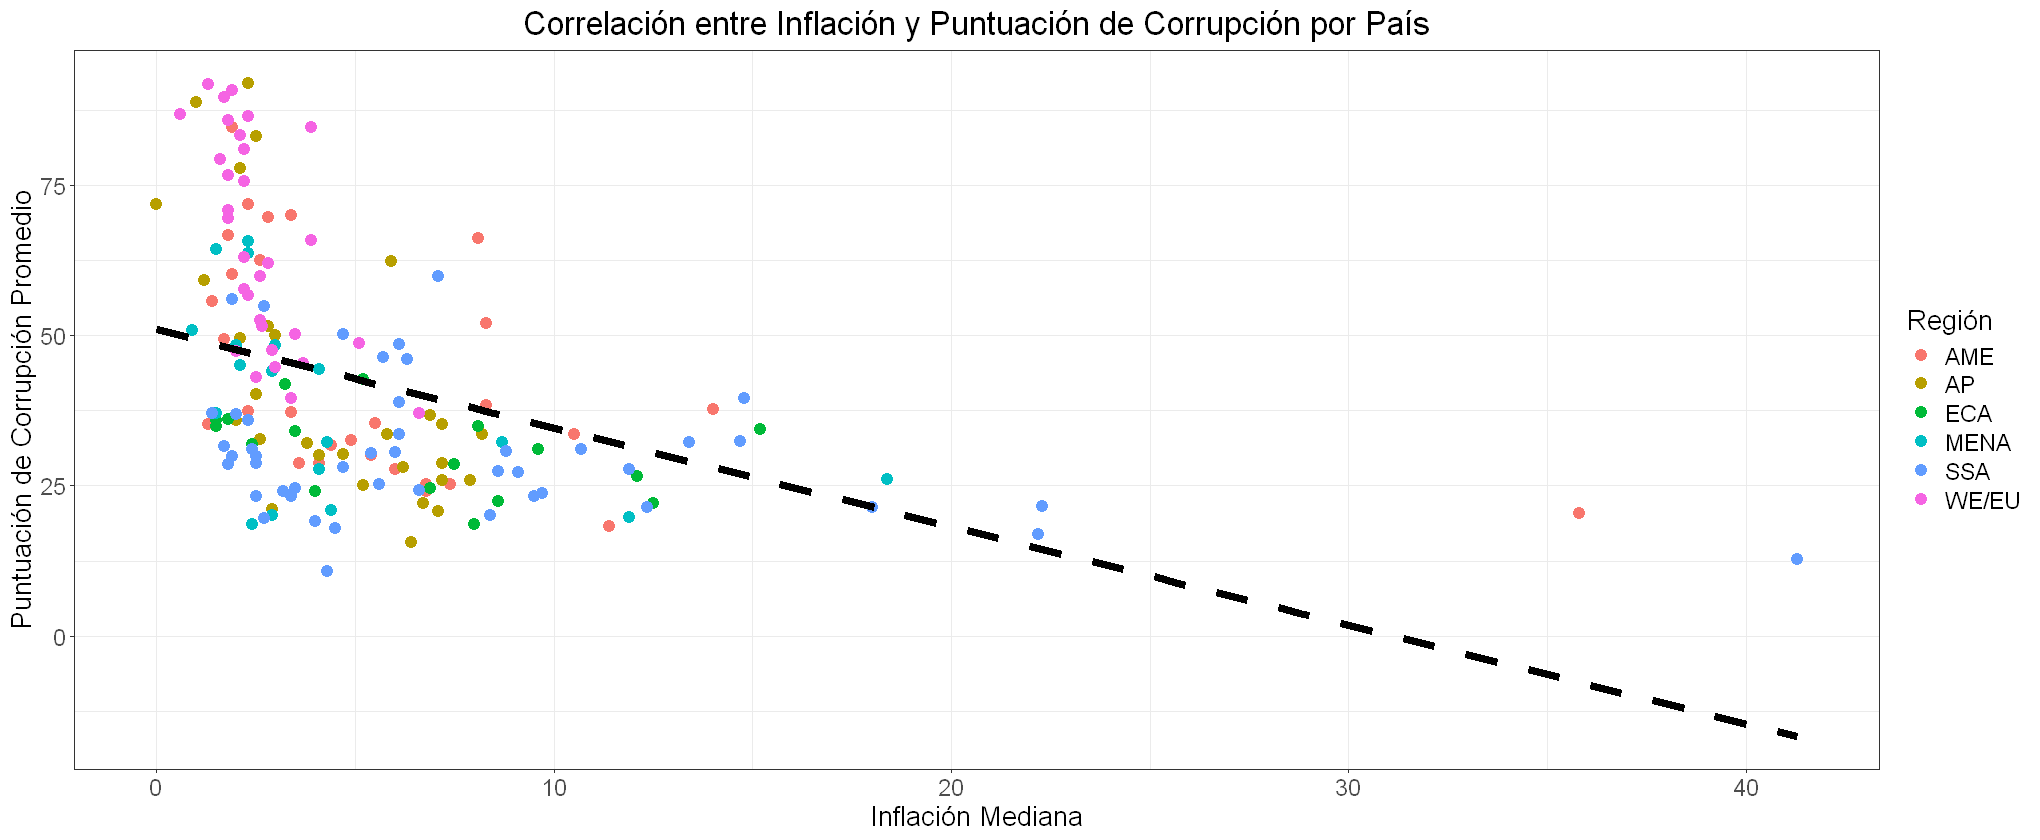

In [29]:
# Calculo los valores medios de inflación y puntuación de corrupción por país
df_avg <- df_melted %>%
    group_by(country, region) %>% # nolint
    summarise(
        inflation = median(inflation, na.rm = TRUE),
        score = mean(score, na.rm = TRUE), .groups = "drop"
    ) %>%
    arrange(region, country)
# Nota1: ordeno por región y país para que el hue siga el mismo orden que el resto
# Nota2: utilizo la mediana para la inflación para evitar que valores extremos 
# como los de Bulgaria y Venezuela ya mencionados.

# Crear el scatter plot para visualizar la correlación entre inflación y puntuación de corrupción
# Crear el scatter plot con una línea de regresión única para todas las regiones
ggplot(df_avg, aes(x = inflation, y = score, color = region)) +
    geom_point(size = 3) +
    geom_smooth(method = "lm", se = FALSE, linetype = "dashed", size = 2.5, color = "black", formula = y ~ x) +
    labs(
        title = "Correlación entre Inflación y Puntuación de Corrupción por País",
        x = "Inflación Mediana",
        y = "Puntuación de Corrupción Promedio",
        color = "Región"
    )


### Análisis de la Correlación entre la Puntuación de Corrupción y la Inflación

El scatterplot muestra la relación entre la inflación y la puntuación de corrupción promedio por país. A continuación, se presentan algunos puntos clave observados en el gráfico:

1. **Tendencia General**:
    - Existe una tendencia negativa entre la inflación y la puntuación de corrupción. Esto sugiere que a medida que aumenta la inflación, la puntuación de corrupción tiende a disminuir, indicando mayores niveles de corrupción.

2. **Regiones con Alta Inflación**:
    - Las regiones como Latinoamérica (AME) y África Subsahariana (SSA) muestran una mayor dispersión en los valores de inflación, con algunos países experimentando inflaciones extremadamente altas. Estos países también tienden a tener puntuaciones de corrupción más bajas, lo que indica altos niveles de corrupción.

3. **Regiones con Baja Inflación**:
    - Europa Occidental y Estados Unidos (WE/EU) y Asia-Pacífico (AP) muestran inflaciones relativamente bajas y puntuaciones de corrupción más altas, lo que indica menores niveles de corrupción. Esto sugiere una mejor gestión económica y políticas más efectivas contra la corrupción en estas regiones.

4. **Línea de Tendencia**:
    - La línea de tendencia discontinua en el gráfico refuerza la relación negativa entre la inflación y la puntuación de corrupción. Aunque hay excepciones, la mayoría de los puntos siguen esta tendencia.

5. **Valores Atípicos**:
    - Se eliminaron los valores atípicos de inflación (percentil 95) para obtener una representación más clara de la tendencia general. Los valores extremadamente altos de inflación empeoraban la visualización de la relación entre las variables.

En resumen, el gráfico sugiere que existe una correlación negativa entre la inflación y la puntuación de corrupción. Las regiones con alta inflación tienden a tener mayores niveles de corrupción, mientras que las regiones con baja inflación muestran menores niveles de corrupción. Este análisis destaca la importancia de la estabilidad económica y la buena gobernanza en la retención del poder adquisitivo de la moneda.

In [17]:
# Calcular el coeficiente de correlación de Spearman
corr_test <- cor.test(df_melted$inflation, df_melted$score,
                      method = "spearman", use = "complete.obs",
                      exact = FALSE)
# Nota: Utilizo el método de Spearman porque no se una distribución normal y hay valores extremos
# Nota: Me saltaba el error de que no era posible calcular el coeficiente exacto, por lo que lo he puesto en FALSE, es decir, que no se calcula exactamente.

# Definir el nivel de significancia
alpha <- 0.05

# Mostrar los resultados
cat("Coeficiente de Correlación de Spearman's Rank:", corr_test$estimate, "\n")
if (corr_test$p.value < alpha) {
  cat("p-valor:", corr_test$p.value, ", Se rechaza la hipótesis nula\n")
} else {
  cat("p-valor:", corr_test$p.value, ", No se rechaza la hipótesis nula\n")
}


Coeficiente de Correlación de Spearman's Rank: -0.4098749 
p-valor: 6.571181e-165 , Se rechaza la hipótesis nula



### Resultado del Coeficiente de Correlación de Spearman's Rank

El Coeficiente de Correlación de Spearman's Rank calculado entre las columnas `inflation` y `score` ha arrojado los siguientes resultados:

- **Coeficiente de Correlación de Spearman's Rank**: -0.4098749
- **p-valor**: 6.571181e-165

#### Interpretación:

1. **Coeficiente de Correlación**:
    - El valor del coeficiente de correlación de Spearman es -0.4098749, lo que indica una correlación negativa moderada entre la inflación y la puntuación de corrupción. Esto sugiere que, en general, a medida que aumenta la inflación, la puntuación de corrupción tiende a disminuir, lo que indica mayores niveles de corrupción.

2. **p-valor**:
    - El p-valor obtenido es extremadamente bajo (6.571181e-165), lo que es mucho menor que el nivel de significancia comúnmente utilizado (α = 0.05). Esto significa que podemos rechazar la hipótesis nula de que no existe correlación entre la inflación y la puntuación de corrupción. En otras palabras, la correlación observada es estadísticamente significativa.

En resumen, los resultados del Coeficiente de Correlación de Spearman's Rank sugieren que existe una correlación negativa significativa entre la inflación y la puntuación de corrupción en los datos analizados.
